In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

# Airline dataset description from Openflights.com
- Airline ID:	Unique OpenFlights identifier for this airline.
- Name:	Name of the airline.
- Alias:	Alias of the airline. For example, All Nippon Airways is commonly known as "ANA".
- IATA:	2-letter IATA code, if available.
- ICAO:	3-letter ICAO code, if available.
- Callsign:	Airline callsign.
- Country:	Country or territory where airline is incorporated.
- Active:	"Y" if the airline is or has until recently been operational, "N" if it is defunct. This field is not reliable: in particular, major airlines that stopped flying long ago, but have not had their IATA code reassigned (eg. Ansett/AN), will incorrectly show as "Y".

In [2]:
airlines = pd.read_csv('airlines.dat',names=['id','name','alias','iata','icao'
                                            ,'callsign','country','active'])
airlines.tail(20)

,id,name,alias,iata,icao,callsign,country,active
6028,19785,Go2Sky,NaN,NaN,RLX,RELAX,Slovakia,Y
6029,19803,All Argentina,All Argentina,L1,AL1,NaN,Argentina,Y
6030,19804,All America,All America,A2,AL2,NaN,United States,Y
6031,19805,All Asia,All Asia,L9,AL3,NaN,China,Y
6032,19806,All Africa,All Africa,9A,99F,NaN,South Africa,Y
6033,19807,Regionalia México,Regionalia México,N4,J88,NaN,Mexico,Y
6034,19808,All Europe,All Europe,N9,N99,NaN,United Kingdom,Y
6035,19809,All Spain,All Spain,N7,N77,NaN,Spain,Y
6036,19810,Regional Air Iceland,Regional Air Iceland,9N,N78,NaN,Iceland,Y
6037,19811,British Air Ferries,NaN,??,??!,NaN,United Kingdom,N


# Airport Dataset from Openflights.com

- Airport ID:	Unique OpenFlights identifier for this airport.
- Name:	Name of airport. May or may not contain the City name.
- City:	Main city served by airport. May be spelled differently from Name.
- Country:	Country or territory where airport is located.
- IATA/FAA:	3-letter FAA code, for airports located in Country "United States of America". 3-letter IATA code, for all other airports.Blank if not assigned.
- ICAO:	4-letter ICAO code. Blank if not assigned.
- Latitude:	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- Longitude:	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- Altitude:	In feet.
- Timezone:	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- DST:	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- Tz: database time zone	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".

In [3]:
airports = pd.read_csv('airports.dat',
                       names=['id','name','city','country'
                                ,'iata','icao'
                                ,'lat','lon'
                                ,'altitude','timezone_offset'
                               ,'DST','tz'])
airports.head(10)

,id,name,city,country,iata,icao,lat,lon,altitude,timezone_offset,DST,tz
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
5,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,19,10.0,U,Pacific/Port_Moresby
6,7,Narsarsuaq,Narssarssuaq,Greenland,UAK,BGBW,61.160517,-45.425978,112,-3.0,E,America/Godthab
7,8,Nuuk,Godthaab,Greenland,GOH,BGGH,64.190922,-51.678064,283,-3.0,E,America/Godthab
8,9,Sondre Stromfjord,Sondrestrom,Greenland,SFJ,BGSF,67.016969,-50.689325,165,-3.0,E,America/Godthab
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531203,-68.703161,251,-4.0,E,America/Thule


# Routes Dataset description from Openflights.com

- Airline:	- 2-letter (IATA) or 3-letter (ICAO) code of the airline.
- Airline ID:	- Unique OpenFlights identifier for airline (see Airline).
- Source airport:	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- Source airport ID:	Unique OpenFlights identifier for source airport (see Airport)
- Destination airport:	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- Destination airport ID:	Unique OpenFlights identifier for destination airport (see Airport)
- Codeshare:	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
- Stops:	Number of stops on this flight ("0" for direct)
- Equipment

In [4]:
routes = pd.read_csv('routes.dat',names=['airline','id','source','source_id'
                                        ,'dest','dest_id','codeshare'
                                        ,'stops','equipment'])
routes.head(10)

,airline,id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
5,2B,410,DME,4029,KZN,2990,NaN,0,CR2
6,2B,410,DME,4029,NBC,6969,NaN,0,CR2
7,2B,410,DME,4029,TGK,\N,NaN,0,CR2
8,2B,410,DME,4029,UUA,6160,NaN,0,CR2
9,2B,410,EGO,6156,KGD,2952,NaN,0,CR2


# Creating a new Basemap instance with the following parameters:
- projection - 'merc' (as a string). Mercator projection
- llcrnrlat - -80 degrees (as an integer).
- urcrnrlat - 80 degrees (as an integer).
- llcrnrlon - -180 degrees (as an integer).
- urcrnrlon - 180 degrees (as an integer).

In [5]:
m = Basemap(projection='merc', llcrnrlat=-80,  urcrnrlat=80, llcrnrlon=-180, urcrnrlon= 180)
# Convert from Series objects to List objects.
lon = airports["lon"].tolist()
lat = airports["lat"].tolist()

In [6]:
# Convert latitude and longitude to x and y coordinates.
x, y = m(lon, lat)
# Display original longitude values
print(lon[0:5])
# Display original latitude values
print(lat[0:5])
# Display x-axis coordinates
print(x[0:5])
# Display y-axis coordinates
print(y[0:5])

[145.39188100000001, 145.78870000000001, 144.295861, 146.72624199999998, 147.22004999999999]
[-6.0816889999999999, -5.2070829999999999, -5.8267889999999998, -6.5698280000000002, -9.4433830000000007]
[36181909.301050939, 36226033.539869711, 36060037.494937442, 36330283.404696316, 36385192.323177092]
[14843790.192350345, 14941516.685582709, 14872287.531036133, 14789178.970177783, 14466473.84037962]


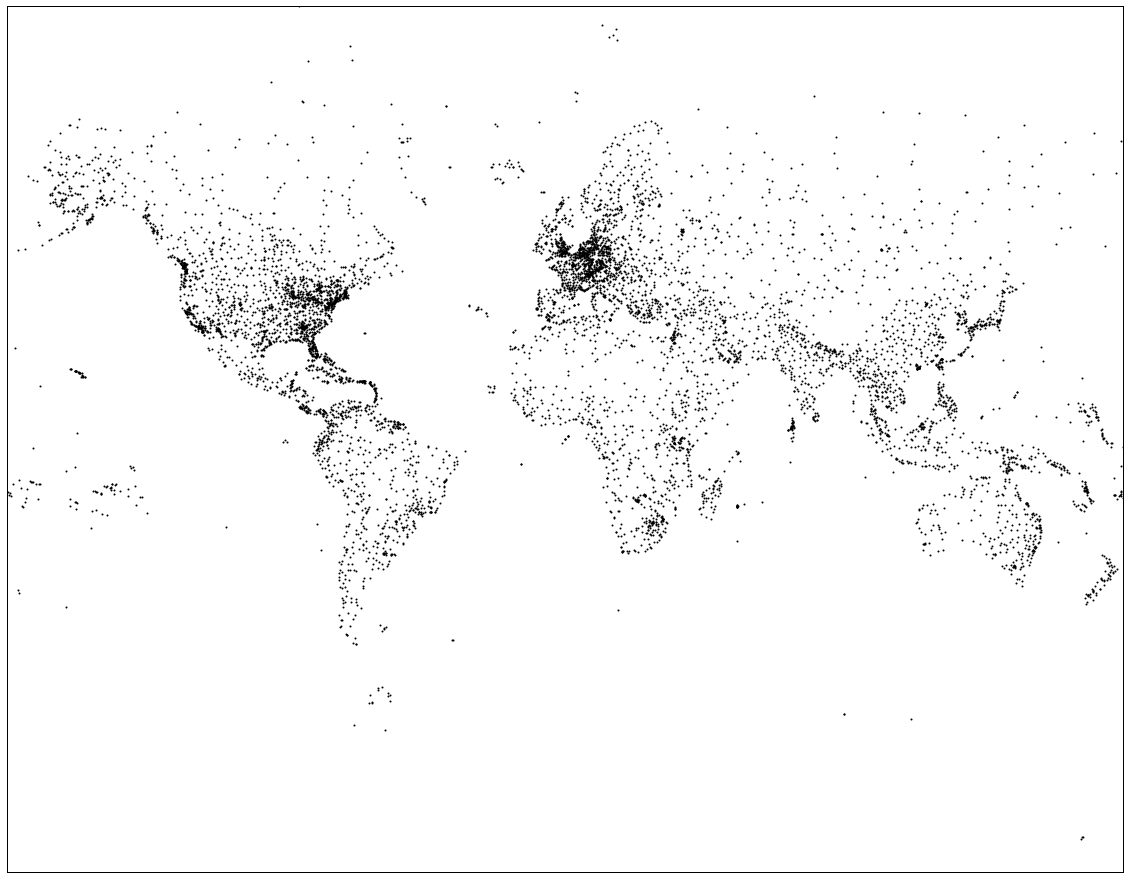

In [7]:
plt.figure(figsize=(20,20))
m.scatter(x,y,s=1)
plt.show()

# Before creating the Basemap instance:
- Creating a Figure with a figsize of 15 inches by 20 inches.
- Creating an Axes object by using the add_subplot() method on the Figure instance to specify a single subplot.
- Calling the set_title() method on the Axes object to set the title to "Scaled Up Earth With Coastlines".

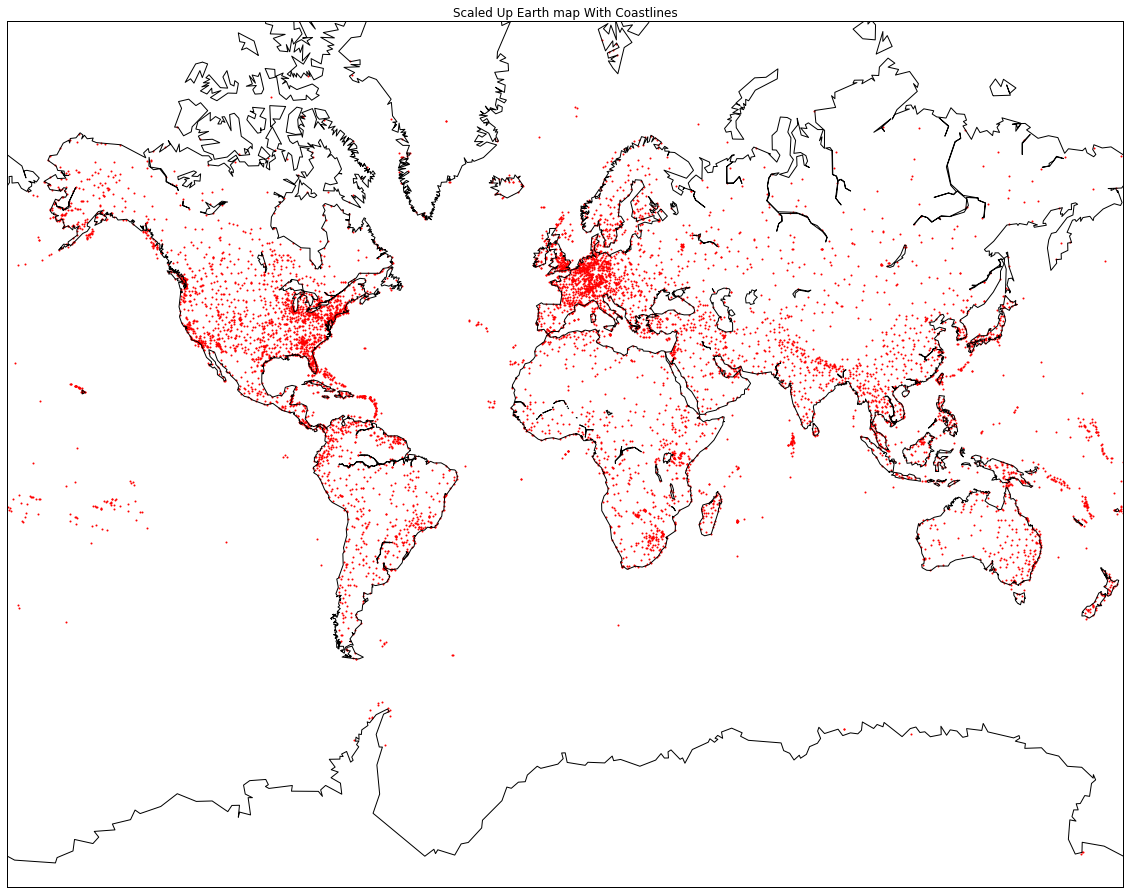

In [8]:
fig = plt.figure(figsize=(20,20))

#Creating axes object
ax = fig.add_subplot(1,1,1)

#Set title
ax.set_title('Scaled Up Earth map With Coastlines')

#Draw a scatter plot with red markers
m.scatter(x,y,s=1,color='red')

#Draw coastlines
m.drawcoastlines()
plt.show()

In [9]:
airports.head(2)

,id,name,city,country,iata,icao,lat,lon,altitude,timezone_offset,DST,tz
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby


In [10]:
routes.head(2)

,airline,id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2


In [11]:
#Checking 'iata' column in airports dframe with 'source' column in routes dframe for code 'AER'

airports[airports['iata']=='AER'].head(2)

,id,name,city,country,iata,icao,lat,lon,altitude,timezone_offset,DST,tz
2886,2965,Sochi,Sochi,Russia,AER,URSS,43.449928,39.956589,89,4.0,N,Europe/Moscow


In [12]:
#Creating a new dataframe that will merge lat lon info with routes

geo_routes = routes[['airline','id','source','dest','equipment']]
geo_routes.head()

,airline,id,source,dest,equipment
0,2B,410,AER,KZN,CR2
1,2B,410,ASF,KZN,CR2
2,2B,410,ASF,MRV,CR2
3,2B,410,CEK,KZN,CR2
4,2B,410,CEK,OVB,CR2


In [13]:
#Changing index to IATA codes
airports.set_index('iata',inplace=True)

In [14]:
airport_locations = airports[['lat','lon']]
airport_locations.head(2)
#pd.isnull(airport_locations)

,lat,lon
iata,,
GKA,-6.081689,145.391881
MAG,-5.207083,145.788700


In [15]:
lat,lon = airport_locations.loc['GKA']
lat,lon

(-6.0816889999999999, 145.39188100000001)

In [16]:
print([i for i in geo_routes['source'].tolist()][:5])

['AER', 'ASF', 'ASF', 'CEK', 'CEK']


In [17]:
#Source
slatlon = airport_locations.loc[[i for i in geo_routes['source'].tolist()]]

#Creating a new index for reindexing the output so that it can be merged with 
#geo_routes dataframe

newidx = np.arange(0,slatlon.shape[0])

slatlon.set_index(newidx,inplace=True)
geo_routes['start_lat'] = slatlon['lat']
geo_routes['start_lon'] = slatlon['lon']

#Destination
dlatlon = airport_locations.loc[[i for i in geo_routes['dest'].tolist()]]
dlatlon.set_index(newidx,inplace=True)
geo_routes['end_lat'] = dlatlon['lat']
geo_routes['end_lon'] = dlatlon['lon']


/home/gpk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gpk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gpk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [18]:
geo_routes.head(3)

,airline,id,source,dest,equipment,start_lat,start_lon,end_lat,end_lon
0,2B,410,AER,KZN,CR2,43.449928,39.956589,55.606186,49.278728
1,2B,410,ASF,KZN,CR2,46.283333,48.006278,55.606186,49.278728
2,2B,410,ASF,MRV,CR2,46.283333,48.006278,44.225072,43.081889


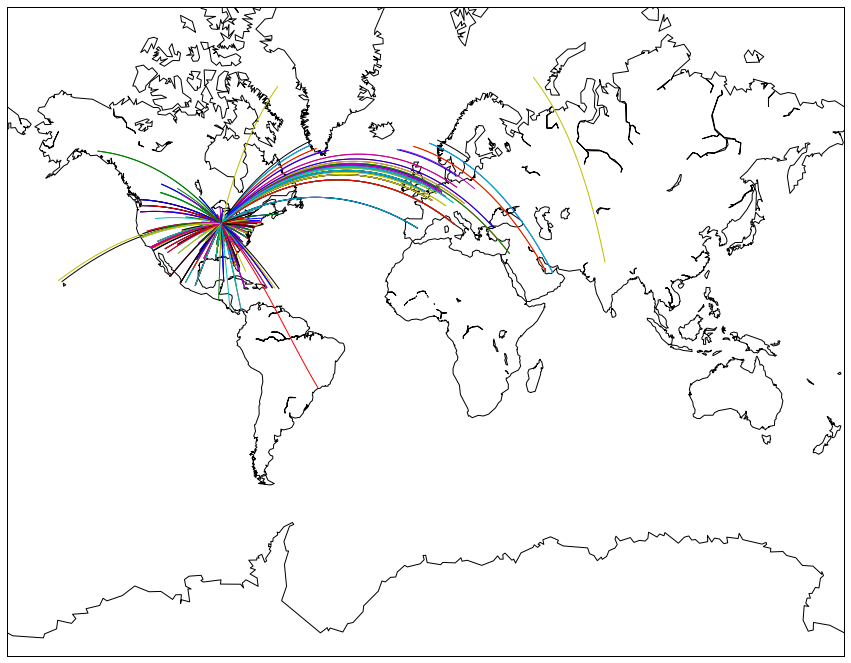

In [19]:
fig = plt.figure(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        start_lon = row['start_lon']
        start_lat = row['start_lat']
        end_lon = row['end_lon']
        end_lat = row['end_lat']

        if abs(end_lat - start_lat) < 180 and abs(end_lon - start_lon) < 180:
            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat, linewidth=1)
            
#Plotting Chicago outbound flights            
chicago_ord_outbound = geo_routes[geo_routes['source']=='ORD']  

create_great_circles(chicago_ord_outbound)

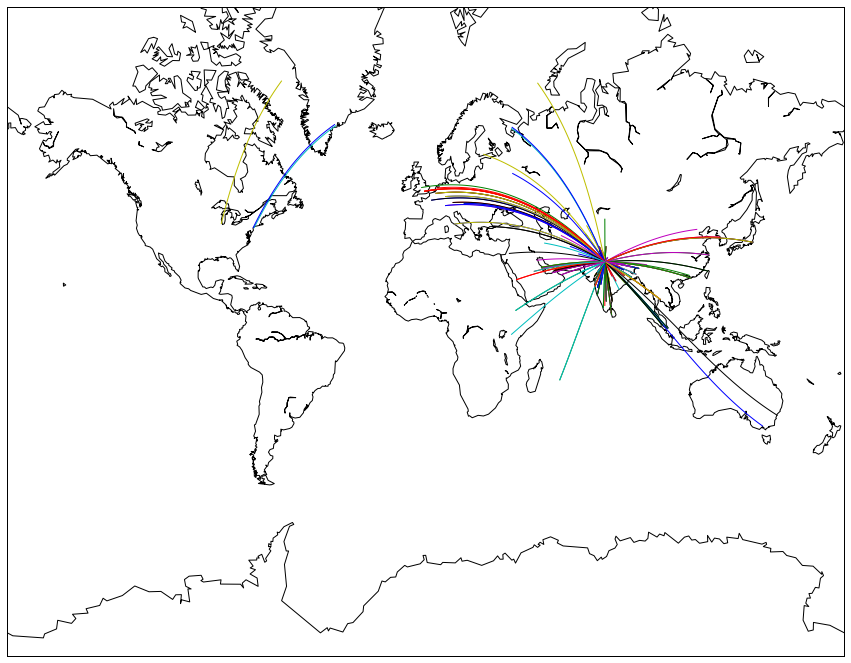

In [20]:
delhi_outbound = geo_routes[geo_routes['source']=='DEL']  

fig = plt.figure(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

create_great_circles(delhi_outbound)

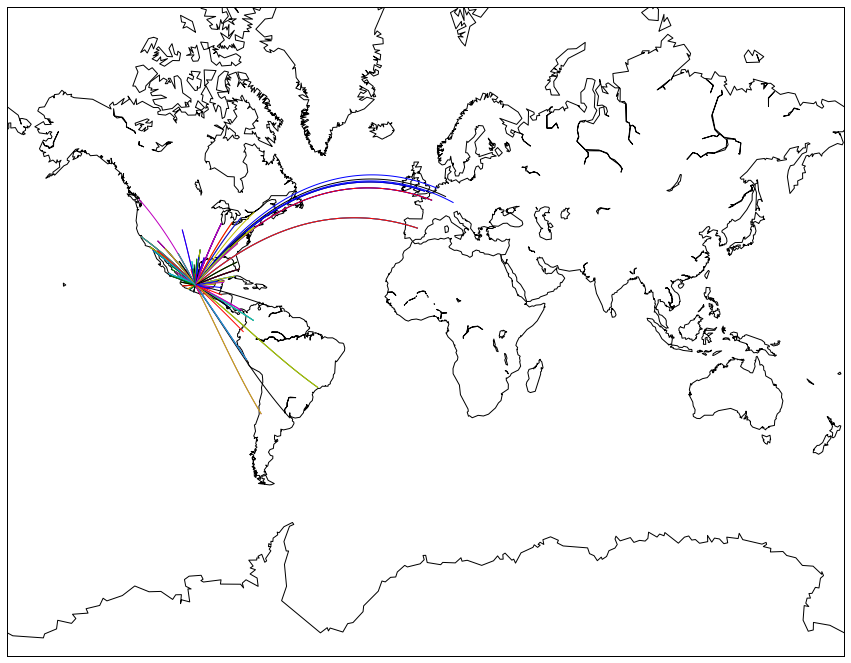

In [21]:
Mumbai_outbound = geo_routes[geo_routes['source']=='MEX']  

fig = plt.figure(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

create_great_circles(Mumbai_outbound)

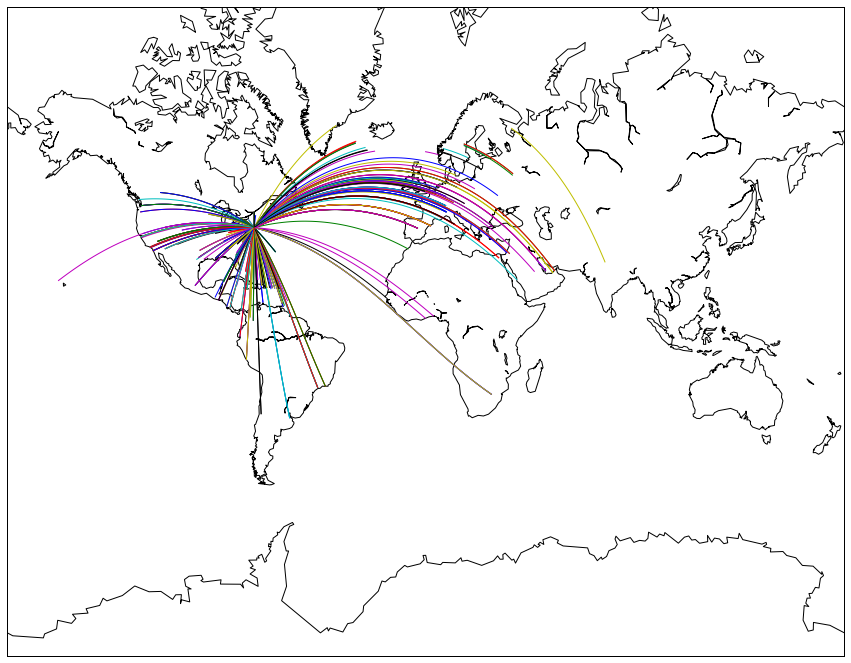

In [22]:
dframe = geo_routes[geo_routes['dest']=='JFK']  

fig = plt.figure(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

create_great_circles(dframe)